In [13]:
#Importación de librerías

import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

In [18]:
# Parámetros del ejercicio simulación poisson
lambda_poisson = 1          # Parámetro lambda para la distribución de Poisson (frecuencia de siniestros)
          # Parámetro de forma de la distribución Gamma

# Función para simular el número de siniestros con Poisson
funcion_poisson= np.random.poisson(lambda_poisson, 1000)
funcion_poisson

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 2, 1, 1, 1, 2, 1, 6, 0,
       1, 1, 1, 2, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 5,
       1, 2, 1, 2, 0, 3, 0, 3, 1, 1, 1, 0, 1, 1, 0, 0, 4, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 2,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 3, 1, 1, 4, 1, 1, 0,
       2, 2, 1, 1, 2, 1, 0, 1, 1, 0, 2, 1, 2, 2, 0, 0, 0, 4, 5, 0, 1, 1,
       5, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0,
       1, 2, 1, 0, 2, 1, 3, 0, 3, 2, 2, 2, 0, 1, 2, 3, 1, 1, 0, 2, 0, 1,
       1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 3, 0, 1, 0, 0, 1, 2, 3, 1,
       0, 0, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 2, 3, 1, 0, 1, 1, 2, 0, 0, 1,
       2, 2, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 3, 2, 0, 1, 2, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 2, 0, 3, 0, 5, 1, 0, 3, 1, 1, 1, 0, 0, 2, 1, 3,
       2, 2, 1, 0, 2, 0, 0, 2, 1, 1, 0, 0, 2, 2, 4,

In [6]:
media_gamma = 2_000_000     # Media de la distribución Gamma (severidad de siniestros)
alpha_gamma = 1
theta=2.5

# Función para simular la severidad de cada siniestro con Gamma
def simular_gamma(media, alpha):
    beta = media / alpha  # Calculamos el parámetro de escala (beta)
    return np.random.gamma(alpha, beta)



Promedio estimado del costo de la cartera para el próximo año: $2,032,251.81
Percentil 95 del costo de la cartera: $7,955,952.03


In [ ]:
# Función para simular el costo total de la cartera para un año
def simular_costo_total(lambda_poisson, media_gamma, alpha_gamma):
    # Simulamos el número de siniestros
    num_siniestros = simular_poisson(lambda_poisson)
    
    # Simulamos el costo total sumando la severidad de cada siniestro
    costo_total = sum(simular_gamma(media_gamma, alpha_gamma) for _ in range(num_siniestros))
    return costo_total


# Número de simulaciones
num_simulaciones = 10_000

# Realizamos las simulaciones y almacenamos los resultados en una lista
resultados = [simular_costo_total(lambda_poisson, media_gamma, alpha_gamma) for _ in range(num_simulaciones)]

# Convertimos a un array de numpy para facilitar el análisis
resultados = np.array(resultados)

# Calculamos estadísticas descriptivas
media_costo = np.mean(resultados)
percentil_95 = np.percentile(resultados, 95)

print(f"Promedio estimado del costo de la cartera para el próximo año: ${media_costo:,.2f}")
print(f"Percentil 95 del costo de la cartera: ${percentil_95:,.2f}")


# Simulación del costo de la cartera para el próximo año
#costo_anual = simular_costo_total(lambda_poisson, media_gamma, alpha_gamma)
#print(f"Costo total estimado de la cartera para el próximo año: ${costo_anual:,.2f}")

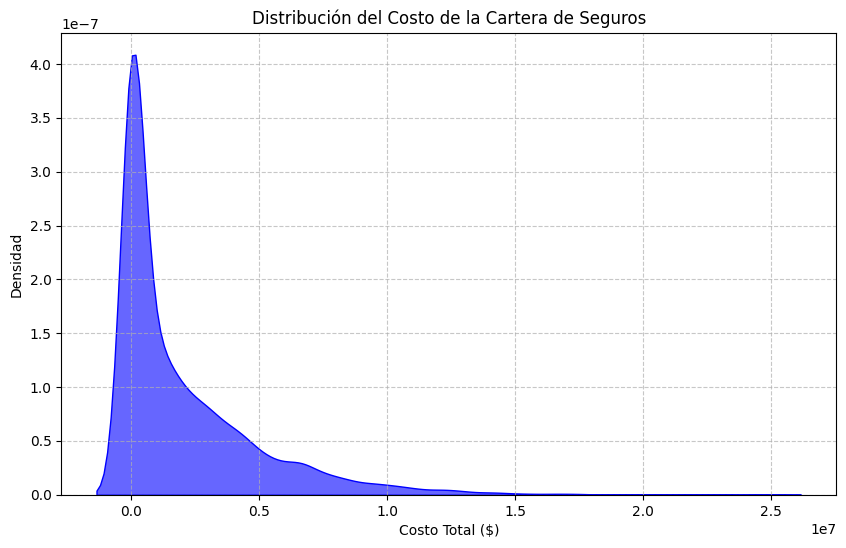

In [15]:
# Graficar la curva de densidad del costo de la cartera
plt.figure(figsize=(10, 6))
sns.kdeplot(resultados, color='blue', fill=True, alpha=0.6)
plt.title('Distribución del Costo de la Cartera de Seguros')
plt.xlabel('Costo Total ($)')
plt.ylabel('Densidad')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()